# Visualize_VGG_activations

In [10]:
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16()

In [57]:
from google.colab import files
x = files.upload()

In [30]:
from tensorflow.keras.preprocessing.image import load_img
img = load_img('cat.1700.jpg', target_size=(224, 224)) # VGG only accepts 224x224
# Convert image to numpy
from keras.preprocessing import image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 224, 224, 3)


## Visualize the activations of the first Conv2D layer

In [62]:
layer_outputs = [layer.output for layer in model.layers[:2]]
my_sub_model = models.Model(inputs = model.input, outputs = layer_outputs)
my_sub_model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Obtain all the activations of the model for this image (by predicting)
activations = my_sub_model.predict(img_tensor)

In [64]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 224, 224, 64)


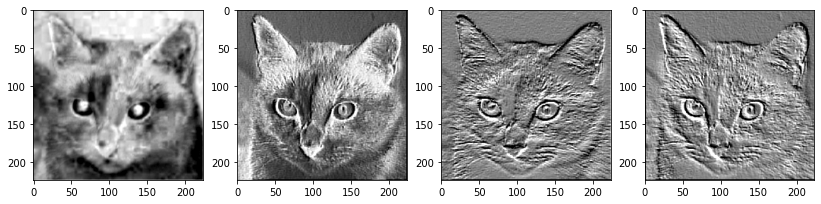

In [65]:
# Visualize the first four channels
fig=plt.figure(figsize=(14, 14))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    channel_image = first_layer_activation[0, :, :, i]
    channel_image -= channel_image.mean()
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    plt.imshow(channel_image, cmap='gray_r')
plt.show()

## Visualize the activations of the second Conv2D layer

In [66]:
layer_outputs = [layer.output for layer in model.layers[:3]]
my_sub_model = models.Model(inputs = model.input, outputs = layer_outputs)
my_sub_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Obtain all the activations of the model for this image (by predicting)
activations = my_sub_model.predict(img_tensor)

In [70]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 224, 224, 64)


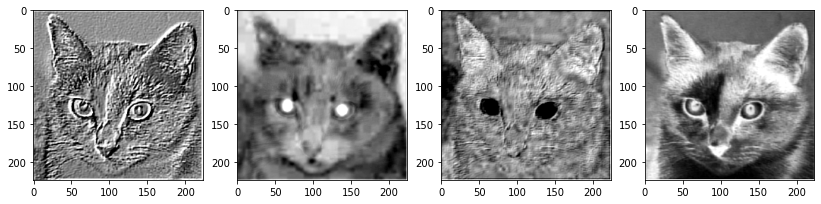

In [71]:
# Visualize the first four channels
fig=plt.figure(figsize=(14, 14))
for i in range(1, 5):
    fig.add_subplot(1, 4, i)
    channel_image = first_layer_activation[0, :, :, i]
    channel_image -= channel_image.mean()
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    plt.imshow(channel_image, cmap='gray_r')
plt.show()